In [49]:
# 导入数据
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Heiti TC'

df_sales = pd.read_csv('./data/易速鲜花订单记录.csv')
df_sales.head()

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,6/1/2020 9:09,五彩玫瑰五支装,32,10.95,15100,北京
1,536376,22114,6/1/2020 9:32,茉莉花白色25枝,48,3.45,15291,上海
2,536376,21733,6/1/2020 9:32,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海
3,536378,22386,6/1/2020 9:37,百合粉色10花苞,10,1.95,14688,北京
4,536378,85099C,6/1/2020 9:37,橙黄香槟色康乃馨,10,1.95,14688,北京


In [50]:
# 整理城市
city = pd.get_dummies(df_sales.城市, prefix='城市')
df_sales = pd.concat([df_sales, city], axis = 1)
df_sales

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,城市_上海,城市_北京,城市_广州,城市_成都,城市_深圳,城市_苏州,城市_西安
0,536374,21258,6/1/2020 9:09,五彩玫瑰五支装,32,10.95,15100,北京,0,1,0,0,0,0,0
1,536376,22114,6/1/2020 9:32,茉莉花白色25枝,48,3.45,15291,上海,1,0,0,0,0,0,0
2,536376,21733,6/1/2020 9:32,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,1,0,0,0,0,0,0
3,536378,22386,6/1/2020 9:37,百合粉色10花苞,10,1.95,14688,北京,0,1,0,0,0,0,0
4,536378,85099C,6/1/2020 9:37,橙黄香槟色康乃馨,10,1.95,14688,北京,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87175,581585,21684,6/9/2021 12:31,产品说明掩码,12,5.00,15804,深圳,0,0,0,0,1,0,0
87176,581585,22398,6/9/2021 12:31,产品说明掩码,12,499.00,15804,深圳,0,0,0,0,1,0,0
87177,581585,23328,6/9/2021 12:31,产品说明掩码,4,58.00,15804,深圳,0,0,0,0,1,0,0
87178,581585,23145,6/9/2021 12:31,产品说明掩码,12,88.90,15804,深圳,0,0,0,0,1,0,0


In [51]:
# 整理日期格式
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期'])
print('日期范围: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max())) 

df_sales = df_sales.loc[df_sales['消费日期'] < '2021-06-01']
print('日期范围: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max())) 

日期范围: 2020-06-01 09:09:00 ~ 2021-06-09 12:31:00
日期范围: 2020-06-01 09:09:00 ~ 2021-05-31 17:39:00


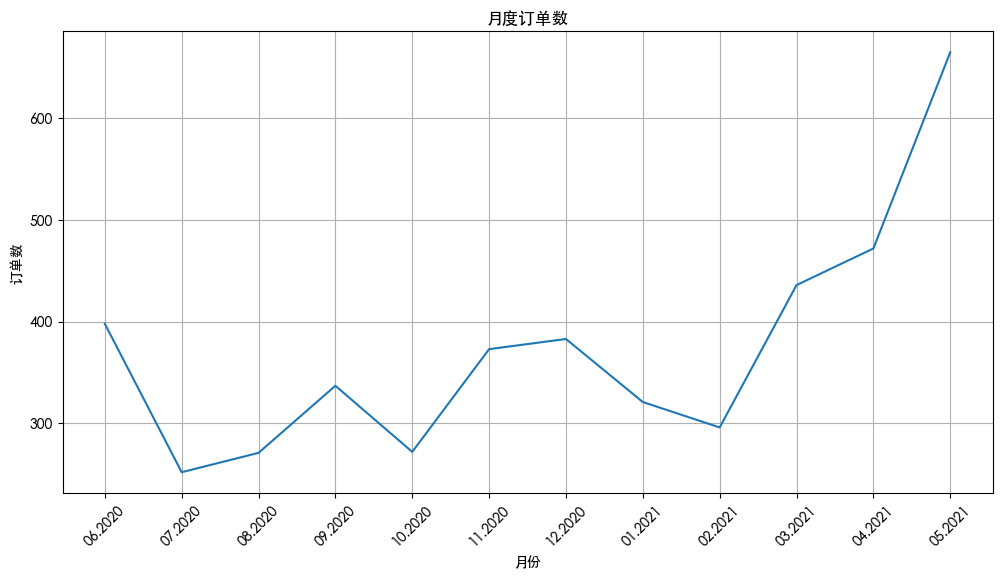

In [52]:
# 数据可视化

#构建月度的订单数的DataFrame
df_orders_monthly = df_sales.set_index('消费日期')['订单号'].resample('M').nunique()
#设定绘图的画布
ax = pd.DataFrame(df_orders_monthly.values).plot(grid=True,figsize=(12,6),legend=False)
ax.set_xlabel('月份') # X轴label
ax.set_ylabel('订单数') # Y轴Label
ax.set_title('月度订单数') # 图题
#设定X轴月份显示格式
plt.xticks(
    range(len(df_orders_monthly.index)), 
    [x.strftime('%m.%Y') for x in df_orders_monthly.index], 
    rotation=45)
plt.show() # 绘图

In [53]:
# 数据清洗
df_sales = df_sales.drop_duplicates();
df_sales = df_sales.loc[df_sales['数量'] > 0]



In [54]:
# 特征工程
df_sales['总价'] = df_sales['数量'] * df_sales['单价']
df_sales.head()

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,城市_上海,城市_北京,城市_广州,城市_成都,城市_深圳,城市_苏州,城市_西安,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,0,1,0,0,0,0,0,350.4
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,1,0,0,0,0,0,0,165.6
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,1,0,0,0,0,0,0,163.2
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,0,1,0,0,0,0,0,19.5
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,0,1,0,0,0,0,0,19.5


In [55]:
# 前 3 个月的 RFM 作为特征
df_sales_3m = df_sales[(df_sales['消费日期'] > '2020-06-01') & (df_sales['消费日期'] < '2020-09-01')]
df_sales_3m.reset_index(drop=True)


df_user_LTV = pd.DataFrame(df_sales['用户码'].unique())
df_user_LTV.columns = ['用户码']
df_user_LTV.head()

df_R_value = df_sales_3m.groupby('用户码')['消费日期'].max().reset_index()
df_R_value.head()
df_R_value.columns = ['用户码', '最近购买日期']
df_R_value['R值'] = (df_R_value['最近购买日期'].max() - df_R_value['最近购买日期']).dt.days
df_user_LTV = pd.merge(df_user_LTV, df_R_value[['用户码', 'R值']], on='用户码')
df_user_LTV.head()


df_F_value = df_sales_3m.groupby('用户码')['消费日期'].count().reset_index()
df_F_value.columns = ['用户码', 'F值']
df_user_LTV = pd.merge(df_user_LTV, df_F_value, on='用户码')

df_M_value = df_sales_3m.groupby('用户码')['总价'].sum().reset_index()
df_M_value.columns = ['用户码', 'M值']
df_user_LTV = pd.merge(df_user_LTV, df_M_value, on='用户码')
df_user_LTV.head()



,用户码,R值,F值,M值
0,15100,51,3,876.00
1,15291,43,33,1372.19
2,14688,1,99,1700.42
3,15311,1,726,14249.56
4,15862,91,64,354.23


In [56]:
# 构建标签
df_user_1y = df_sales.groupby('用户码')['总价'].max().reset_index()
df_user_1y.columns = ['用户码', '年度LTV']

df_LTV = pd.merge(df_user_LTV, df_user_1y, on='用户码', how='left')
df_LTV

,用户码,R值,F值,M值,年度LTV
0,15100,51,3,876.00,350.40
1,15291,43,33,1372.19,243.36
2,14688,1,99,1700.42,153.00
3,15311,1,726,14249.56,408.00
4,15862,91,64,354.23,40.56
...,...,...,...,...,...
372,15622,0,29,576.00,49.95
373,15104,0,28,374.64,33.90
374,15643,0,23,337.10,66.40
375,15031,0,24,150.83,72.00


In [57]:
# 创建特征集和标签集
X = df_LTV.drop(['用户码', '年度LTV'], axis=1) # 特征
X.head()

y = df_LTV['年度LTV'] # 标签
y.head()

# 数据集划分
from sklearn.model_selection import train_test_split
# 先拆分训练集和其他集
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=36)
# 再拆分验证集和测试集
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, train_size=0.5, random_state=36)



In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 选择算法、创建模型
model_lr = LinearRegression()
model_dtr = DecisionTreeRegressor()
model_rfr = RandomForestRegressor()

# 训练模型
model_lr.fit(X_train, y_train)
model_dtr.fit(X_train, y_train)
model_rfr.fit(X_train, y_train)

# 评估模型
y_valid_pred_lr = model_lr.predict(X_valid)
y_valid_pred_dtr = model_dtr.predict(X_valid)
y_valid_pred_rfr = model_rfr.predict(X_valid)

X_valid.iloc[2]



R值     40.00
F值     11.00
M值    135.75
Name: 263, dtype: float64

In [60]:
print('真值:', y_valid.iloc[2]) #真值
print('线性回归预测值:', y_valid_pred_lr[2]) #线性回归模型预测值
print('决策树预测值:', y_valid_pred_dtr[2]) #决策树模型预测值
print('随机森林预测值:', y_valid_pred_rfr[2]) #随机森林模型预测值


真值: 19.8
线性回归预测值: 120.24285720536952
决策树预测值: 17.700000000000003
随机森林预测值: 42.472499999999975


In [61]:
from sklearn.metrics import r2_score, median_absolute_error
print('验证集上的R平方分数-线性回归: %0.4f' % r2_score(y_valid, model_lr.predict(X_valid)))
print('验证集上的R平方分数-决策树: %0.4f' % r2_score(y_valid, model_dtr.predict(X_valid)))
print('验证集上的R平方分数-随机森林: %0.4f' % r2_score(y_valid, model_rfr.predict(X_valid)))



验证集上的R平方分数-线性回归: 0.6178
验证集上的R平方分数-决策树: 0.4756
验证集上的R平方分数-随机森林: 0.4449


Text(0.5, 1.0, '实际值 vs. 预测值')

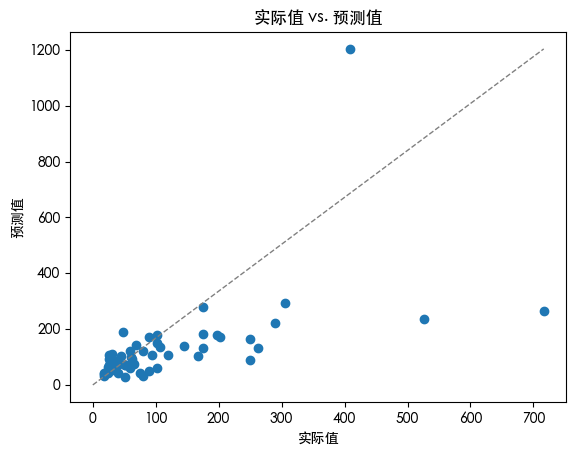

In [63]:
y_test_pred_rfr = model_rfr.predict(X_test)
plt.scatter(y_test, y_test_pred_rfr)
plt.plot([0, max(y_test)], [0, max(y_test_pred_rfr)],   color='gray', lw=1, linestyle='--') #绘图
plt.xlabel('实际值') #X轴
plt.ylabel('预测值') #Y轴
plt.title('实际值 vs. 预测值') #标题

In [ ]:
import numpy as np #导入NumPy
  
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i/50+x[i], round(y[i], 3)+0.02, round(y[i], 3), ha = 'center')

# fig = plt.figure()
fig, ax = plt.subplots()    
# ax = fig.add_axes([0,0,1,1])
# scaler = ['StandardScaler', 'MinMaxScaler']

width = 0.25

# bars1 = [r2_score(y_train, model_lr.predict(X_train_norm)),
#          r2_score(y_train, model_lasso.predict(X_train_norm)),
#         r2_score(y_train, model_ridge.predict(X_train_norm))]
bars1 = [r2_score(y_valid, model_lr.predict(X_valid))]
bars2 = [r2_score(y_valid, model_dtr.predict(X_valid))]
bars3 = [r2_score(y_valid, model_rfr.predict(X_valid))]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]
r3 = [x + width*2 for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = width, color = 'blue', edgecolor = 'black', capsize=7, label='线性回归')
 
# Create cyan bars
plt.bar(r2, bars2, width = width, color = 'cyan', edgecolor = 'black', capsize=7, label='决策树回归')

# Create cyan bars
plt.bar(r3, bars3, width = width, color = 'yellow', edgecolor = 'black', capsize=7, label='随机森林回归')

# general layout
# plt.xticks([r + width/2 for r in range(len(bars1))], ['训练集', '测试集'])
plt.xticks([r + width for r in range(len(bars1))], ['验证集'])
plt.ylabel('R2分数')
plt.xlabel('模型')
plt.legend()


# calling the function to add value labels
addlabels(r1, bars1)
addlabels(r2, bars2)
addlabels(r3, bars3)
 
# Show graphic
plt.show()